# Исследование надежности заемщиков.

## Описание проекта

Кредитному отделу банка нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Для этого имеется статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

__Описание данных:__
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Импорт библиотек

In [2]:
import pandas as pd

## Обзор данных

Извлечение данных и просмотр информации о них.

In [3]:
data = pd.read_csv('datasets\data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
# Прсомотр первых 5 строк с данными
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [5]:
# Определение количества пропущенных значений
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропуски обнаружены в двух столбцах days_employed тип данных float64 и total_income тип данных float64.

In [6]:
2174 / 21525

0.10099883855981417

Доля пропусков составляет 10%.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Ещё можно посмотреть долю пропущенных значений среди всех данных следующим способом
    
    df.isna().mean()
</div>

In [7]:
data.isna()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,False,False,False,False,False,False,False,False,False,False,False,False
21521,False,False,False,False,False,False,False,False,False,False,False,False
21522,False,False,False,False,False,False,False,False,False,False,False,False
21523,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [9]:
# просмотр данных с пропусками
data_with_NaN = data[data['total_income'].isnull()]
display(data_with_NaN)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Просмотр данных с пропусками показывает, что имеются 2174 строки у которых в двух столбцах days_employed и total_income	нет значений (NaN) 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Целью первичного анализа данных является выявление проблем с данными, с которыми нужно будет поработать. Чем больше всего мы найдём в этом шаге, тем лучше сможем построить дальнейший план работы и понять с чем нам стоит работать, а на что можно закрыть глаза. Старайся указывать как можно больше проблем в данных, которые ты найдешь (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Во время первичного анализа данных, может помочь метод describe(). Он покажет разброс значений, максимум, минимум, среднее и медиану. 
</div>

## Предобработка данных.

В данном разделе будет проведено выявление дубликатов и обследование значений данных по столбцам.

### Поиск явных дубликатов и их удаление

In [10]:
# Определение количества явных дубликатов
data.duplicated().sum()

54

In [11]:
# удаление явных дубликатов
data = data.drop_duplicates().reset_index(drop=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21471 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21471 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👍
</div>

### Обследование значений данных по столбцам

#### Столбец days_employed просмотр значений

In [14]:
# Проверка минимальных значений столбца days_employed (общий трудовой стаж в днях)
data.dropna(subset=['days_employed']).sort_values(by='days_employed').head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16307,1,-18388.949901,61,среднее,1,женат / замужем,0,F,сотрудник,0,186178.934089,операции с недвижимостью
4297,0,-17615.563266,61,среднее,1,женат / замужем,0,F,компаньон,0,122560.741753,покупка жилья
7325,0,-16593.472817,60,высшее,0,женат / замужем,0,F,сотрудник,0,124697.846781,заняться высшим образованием
17804,0,-16264.699501,59,среднее,1,женат / замужем,0,F,сотрудник,0,51238.967133,на покупку автомобиля
16796,0,-16119.687737,64,среднее,1,женат / замужем,0,F,сотрудник,0,91527.685995,покупка жилой недвижимости


В столбце days_employed (общий трудовой стаж в днях) есть данные с отрицательными значениями, что не соответсвуют действительности. Это аномальные данные, которые могли возникнуть в результате ошибки. Ошибка может быть связана с вычислением общего трудового стажа, который вычисляется вычитанием из текущей даты даты начала трудового стажа. Если вычитание производилось наоборот из даты начала трудового стажа вычитали текущую дату, то это могло привести к появлению отрицательных значений.

In [15]:
# Проверка максимальных значений столбца days_employed (общий трудовой стаж в днях)
data.dropna(subset=['days_employed']).sort_values(by='days_employed').tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
7790,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
7660,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем
9997,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования
6950,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью


Максимальные значения в столбце days_employed также являются аномальными.  Максимальные значения трудоваого стажа в годах составляют 1100 лет, что намного превышает максимальное значение стажа в 50 лет.

Для обзора данных построим гистограмму по стажу работы в годах

In [16]:
# Создание столбца year_employed стаж работы в годах
data['year_employed'] = data['days_employed'] / 365


Bad key text.latex.preview in file C:\Users\11931\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\11931\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\11931\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_qua

Text(0.5, 1.0, 'Гистограмма Стаж работы в годах')

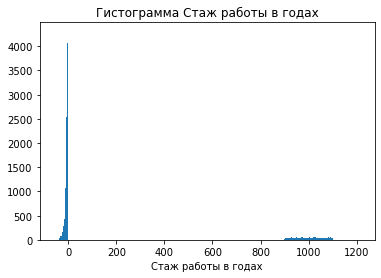

In [17]:
import matplotlib.pyplot as plt
plt.hist(data['year_employed'], bins=500,
         range=(data['year_employed'].min() * 1.1, data['year_employed'].max() * 1.1))
plt.xlabel('Стаж работы в годах')
plt.title('Гистограмма Стаж работы в годах')

Из гистограммы видно, что данные в столбце days imployed имеют либо отрицательные значения, либо значения находящиеся в области 1000 лет, что является аномальным.
Так как в данном исследовании не требуется выявлять зависимости от стажа работы, то можно эти данные не принимать во внимание.
Также нужно проинформировать подразделение осуществлявшее подготовку данных об этих аномалиях и попросить их разобраться в его причинах.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Аномально высокие значения в столбце days_employed можно разделить на 24 (гипотеза в том, что эти значения получились из-за того, что стаж указан в часах) и тогда получится вполне себе адекватный стаж (в реальной задаче, прежде чем такое делать, стоит уточнить могла ли быть такая ошибка при выгрузке/заполнении данных)
</div>

#### Столбец total_income просмотр значений.

Проведём расчёт статистических показателей значений столбца total_income

In [18]:
data['total_income'].describe()

count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

Полученные значения показывают, что значения находятся в диапазоне от 21 тыс. руб до 2,27 млн. руб, среднее значение составляе 150 тыс. руб, что соответствует возможному разбросу доходов граждан.

Для проверки распределения дохода клиентов банка построим гистограмму ежемесячного дохода.

Text(0.5, 1.0, 'Гистограмма ежемесячного дохода')

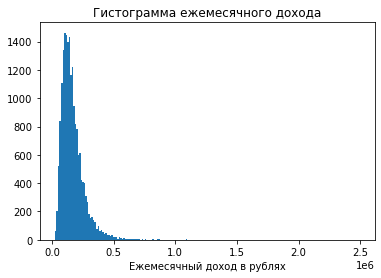

In [19]:
import matplotlib.pyplot as plt
plt.hist(data['total_income'], bins=200,
         range=(data['total_income'].min() * 1.1, data['total_income'].max() * 1.1))
plt.xlabel('Ежемесячный доход в рублях')
plt.title('Гистограмма ежемесячного дохода')

Из графика видно, что каких-либо аномальных значений в гистограмме ежемесячного дохода не наблюдается.

#### Столбец incom_type просмотр значений.

Рассчитаем количество клиентов банка по типу дохода.

In [20]:
data['income_type'].value_counts()

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

В полученных данных, каких-либо аномалий не видно.

#### Столбец children просмотр значений.

In [21]:
# Просмотр уникальных значений и их количества в столбце children 
data['children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В столбце children есть неправильное значение -1 и аномальное значение 20. Скорее всего значение -1 это ошибка набора и его можно исправить на 1. Значение 20 выбивается из распределения количества заёмщиков по количеству детей, и вероятнее всего связано с ошибкой набора. Это значение можно отнести к значению 2 детей.

In [22]:
# Исправление значений -1 в столбце children на 1
data.loc[data['children'] == -1, ['children']]= 1
data[data['children'] == -1]['children'].count()

0

In [23]:
# Исправление значений 20 в столбце children на 2
data.loc[data['children'] == 20, ['children']] = 2
data[data['children'] == 20]['children'].count()

0

In [24]:
# Проверка распределения по количеству детей после исправлений аномальных данных
data['children'].value_counts()

0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличное решение!
</div>

####  Столбцы family_status и family_status_id просмотр значений.

In [25]:
# Просмотр уникальных значений и их количества в столбцах family_status и family_status_id
data['family_status'].value_counts()

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [26]:
data['family_status_id'].value_counts()

0    12344
1     4163
4     2810
3     1195
2      959
Name: family_status_id, dtype: int64

В столбце family_status и family_status_id каких-либо аномалий не обнаружено. 

#### Столбцы education и education_id просмотр значений.

In [27]:
data['education'].value_counts()

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

В столбце education присутствуют неявные дубликаты связанные с регистром букв.

In [28]:
# приведение значений к строчному регистру
data['education'] = data['education'].str.lower()

In [29]:
# Просмотр уникальных значений и их количества
data['education'].value_counts()

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Шикарно! Убрали оставшиеся дубликаты
</div>

In [30]:
data['education_id'].value_counts()

1    15188
0     5251
2      744
3      282
4        6
Name: education_id, dtype: int64

В столбцах education_id и education после преобразования неявных дубликатов, каких-либо аномалий не обнаружено.

####  Столбец dob_yeras просмотр значений.

<AxesSubplot:>

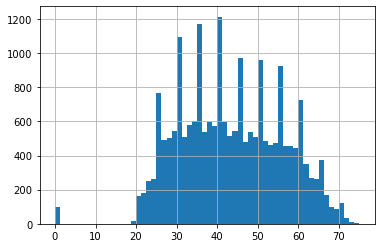

In [31]:
data['dob_years'].hist(bins=60)

In [32]:
year_counts_ser = data['dob_years'].value_counts()
display(year_counts_ser)

35    616
40    607
41    606
34    601
38    597
42    596
33    581
39    572
31    559
36    554
44    545
29    544
30    538
48    537
37    536
50    513
43    512
32    509
49    508
28    503
45    497
27    493
52    484
56    484
47    477
54    476
46    473
53    459
57    456
58    456
51    448
59    443
55    443
26    408
60    374
25    357
61    354
62    349
63    269
24    264
64    262
23    253
65    194
22    183
66    182
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

В столбце dob_years есть аномальные значения возраста равные 0 в количестве 101 строка.

In [33]:
# Просмотр данных с 0 значение в столбце dob_years
data[data['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,year_employed
99,0,346541.618895,0,среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль,949.429093
149,0,-2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем,-7.299379
270,3,-1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью,-5.130584
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости,1090.017986
1040,0,-1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль,-3.172684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19784,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье,NaN
20413,0,338734.868540,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья,928.040736
20528,0,331741.271455,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость,908.880196
21127,2,-108.967042,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости,-0.298540


Так как в данном исследовании не планируется проверять зависимость задолженности от возраста данные можно оставить

#### Столбец gender (пол) просмотр значений.

In [34]:
data['gender'].value_counts()

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

In [35]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,year_employed
10690,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости,-6.461919


В данных есть 1 аномальное значение XNA. Так как в данном исследование не планируется изучать зависимость задолженности от пола, то это строку можно оставить.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Поддерживаю! Так как мы не можем достоверно сказать, к какому полу ближе это значение, его стоит или удалить или не трогать)
</div>

#### Столбец debt просмотр значений.

In [36]:
data['debt'].value_counts()

0    19730
1     1741
Name: debt, dtype: int64

В столбце debt присутствуют 2 значения 0 - нет задолженности, 1 - есть задолженность. Каких-либо аномалий в данных нет.

#### Столбец purpose просмотр значений.

In [37]:
data['purpose'].value_counts()

свадьба                                   793
на проведение свадьбы                     773
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
покупка жилья для сдачи                   652
операции с жильем                         652
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

В столбце purpose присутствует большое количество различных значений. Перед исследованием нужно провести категоризацию этих значений, что будет сделано в разделе категоризация.

### Заполнение пропусков

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21471 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21471 non-null  object 
 12  year_employed     19351 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


In [39]:
# Расчёт количества не заполненных значений в столбце total_income
print(data['total_income'].isna().sum())
print(round((data['total_income'].isna().sum() / 21471) * 100, 1), '%')

2120
9.9 %


В столбце total income присутствует 9,9 % незаполненых значений. Так как мы не знаем причину данных пропусков и их количество составляет необольшу долю в 9,9 %, то для дальнейшего исследования заполним эти пустые значения 0 и в категоризации присвоим им группу нет информации.

In [40]:
# Заполнение пропусков в столбце total_income 0 значением
data['total_income'] = data['total_income'].fillna(0)
# проверка заполнения пропусков
data['total_income'].isna().sum()

0

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>По заданию необходимо заменить пропуски медианой (в столбце days_employed в том числе)
</div>

### Изменение типов данных.

Значения в столбце total_income имеют вещественный тип. Данные после запятой имеют значение копеек, которые имеют очень малую долю от сумм доходов. Для удобства расчётов значение в этом столбце лучше перевести из вещественного типа данных в целочисленный.

In [41]:
# Изменение типа данных столбца total_income на тип int
data['total_income'] = data['total_income'].astype('int')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Тут всё верно!
</div>

### Удаление дубликатов.

In [42]:
data.duplicated().sum()

17

В данных появились еще 17 дубликатов. Такое возможно, так как данные уже изменялись, поэтому удалять их не будем.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👍
</div>

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создание словаря по колонкам education_id, education

In [43]:
education_id_dict = data[['education_id', 'education']]

In [44]:
# Удаление дубликатов из справочника education_id_table
education_id_dict = education_id_dict.drop_duplicates().reset_index(drop=True)

In [45]:
print(education_id_dict)

   education_id            education
0             0               высшее
1             1              среднее
2             2  неоконченное высшее
3             3            начальное
4             4       ученая степень


In [46]:
# Удаление столбца education из основной таблицы данных data
del data['education']

Создание словаря по колонкам family_status_id, family_status

In [47]:
family_status_id_dict = data[['family_status_id', 'family_status']]
family_status_id_dict = family_status_id_dict.drop_duplicates().reset_index(drop=True)
print(family_status_id_dict)

   family_status_id          family_status
0                 0        женат / замужем
1                 1       гражданский брак
2                 2         вдовец / вдова
3                 3              в разводе
4                 4  Не женат / не замужем


In [48]:
# Удаление столбца family_status
del data['family_status']

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Тут всё правильно 👌
</div>

### Категоризация 

#### Категоризация дохода.

Для анализа зависимости задолженности от дохода необходимо провести категоризацию дохода.
Вначале создадим справочник категория дохода - описание

In [49]:
category_income_value = [
    ['No inf', 'Нет информации'],
    ['E', '          0 - 30 тыс руб'],
    ['D', ' 30 тыс руб - 50 тыс руб'],
    ['C', ' 50 тыс руб - 200 тыс руб'],
    ['B', '200 тыс руб - 1 млн руб'],
    ['A', '  1 млн руб и более']
]
category_income_value_descr = pd.DataFrame(data=category_income_value, columns=['total_income_category', 'description'])

In [50]:
display(category_income_value_descr)

,total_income_category,description
0,No inf,Нет информации
1,E,0 - 30 тыс руб
2,D,30 тыс руб - 50 тыс руб
3,C,50 тыс руб - 200 тыс руб
4,B,200 тыс руб - 1 млн руб
5,A,1 млн руб и более


Проведем категоризацию по столбцу total_income.

In [51]:
# Функция категоризации дохода
def incom_category (value_total_income):
    if value_total_income == 0:
        return('No inf')
    if 0 < value_total_income <= 30000:
        return('E')
    elif value_total_income <= 50000:
        return('D')
    elif value_total_income <= 200000:
        return('C')
    elif value_total_income <= 1000000:
        return('B')
    else:
        return('A')
# создание столбца с категорией дохода        
data['total_income_category'] = data['total_income'].apply(incom_category)

In [52]:
# проверка получившейся категоризации
data['total_income_category'].value_counts()

C         13913
B          5041
No inf     2120
D           350
A            25
E            22
Name: total_income_category, dtype: int64

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Нужно поправить категоризацию после замены пропусков
</div>

#### Категоризация целей кредита.

Проведём категоризацию по целям кредита. Из значений столбца purpose можно выделить 4 категории:
1) проведение свадьбы, 2) операции с недвижимостью 3) операции с амтомобилем 4) получение образования

In [53]:
# Функция для категоризации значений столбца purpouse
def func_purpose_category (purpose):
    if 'свадьб' in purpose:
        return('проведение свадьбы')
    elif 'недвижимост' in purpose:
        return('операции с недвижимостью')
    elif 'жиль' in purpose:
        return('операции с недвижимостью')
    elif 'автомобил' in purpose:
        return('операции с автомобилем')
    elif 'образован' in purpose:
        return('получение образования')
    else:
        return('ошибка категоризации')
data['purpose_category'] = data['purpose'].apply(func_purpose_category)

In [54]:
# проверка получившейся категоризации
data['purpose_category'].value_counts()

операции с недвижимостью    10814
операции с автомобилем       4308
получение образования        4014
проведение свадьбы           2335
Name: purpose_category, dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Основные цели кредита определены правильно! 👍
</div>

## Исследование данных, проверка гипотез

### Предисловие 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Понял. Принял)
</div>

### Добавление к данным столбца 'debt_str' с значениями 'debt', 'no_debt'

In [55]:
data['debt'].value_counts()

0    19730
1     1741
Name: debt, dtype: int64

In [56]:
def debt_str (debt):
    if debt == 0:
        return('no_debt')
    elif debt == 1:
        return('debt')
    else:
        return('ошибка категоризации')
        
data['debt_str'] = data['debt'].apply(debt_str)
data['debt_str'].value_counts()

no_debt    19730
debt        1741
Name: debt_str, dtype: int64

### Гипотезы и описание метода их проверки

В данном разделе проверяются 4 гипотезы. Будет проверяться зависимость возврата кредита в срок от различных факторов:
1) от количества детей в семье
2) от семейного положения
3) от уровня дохода
4) от цели кредита

Проверяться гипотезы будут по сравнению долей клиентов с задолженностью и без задолженности при разных значениях категориальных признаков.
Для этого создаётся сводная таблица, в которой по строкам будут идти категориальные значения исследуемого признака, а по столбцам состояние задолженности есть задолженность, нет задолженности. В ячейках будут находится количество клиентов с выбранными признаками.
Затем будет вычисляться по категориальному значению в строке доля с задолженность и без задолженности.
Вычислинные доли будут сравниваться для различных категориальных признаков.

### Проверка гипотез о зависимости задолженности от различных факторов 

#### Количество детей в семье - задолженность

Создание сводной таблицы количества детей - состояния задолженности.

In [57]:
children_debt = data.pivot_table(index = 'children', columns = 'debt_str', values = 'debt', aggfunc = 'count')
display(children_debt)

debt_str,debt,no_debt
children,,
0,1063.0,13044.0
1,445.0,4411.0
2,202.0,1926.0
3,27.0,303.0
4,4.0,37.0
5,NaN,9.0


In [58]:
# замена значения NaN в столбце debt на 0
children_debt.loc[5, 'debt'] = 0
display(children_debt)

debt_str,debt,no_debt
children,,
0,1063.0,13044.0
1,445.0,4411.0
2,202.0,1926.0
3,27.0,303.0
4,4.0,37.0
5,0.0,9.0


Расчёт долей по состоянию задолженности в процентах для разных значений количества детей. 

In [59]:
# сумма значений с задолженностью и без задолженности
children_debt['sum'] = children_debt['debt'] + children_debt['no_debt']
# определение доли с задолженностью
children_debt['debt_ratio'] = (children_debt['debt'] / children_debt['sum']) * 100
children_debt['debt_ratio'] = round(children_debt['debt_ratio'], 1)
# определение доли без задолженности
children_debt['no_debt_ratio'] = (children_debt['no_debt'] / children_debt['sum']) * 100
children_debt['no_debt_ratio'] = round(children_debt['no_debt_ratio'], 1)
children_debt['sum_ratio'] = (children_debt['sum'] / children_debt['sum']) * 100
display(children_debt)

debt_str,debt,no_debt,sum,debt_ratio,no_debt_ratio,sum_ratio
children,,,,,,
0,1063.0,13044.0,14107.0,7.5,92.5,100.0
1,445.0,4411.0,4856.0,9.2,90.8,100.0
2,202.0,1926.0,2128.0,9.5,90.5,100.0
3,27.0,303.0,330.0,8.2,91.8,100.0
4,4.0,37.0,41.0,9.8,90.2,100.0
5,0.0,9.0,9.0,0.0,100.0,100.0


Из полученных значений видно, что клиенты без детей имеют меньшую задолженнсть, чем клиенты с детьми. Между двумя самыми многочисленными группами без детей и с 1 ребёнком разница между должниками составляет 1,7%. Группы с 2-5 детьми малочисленны и вместе составляют около 10%, разница между ними не такая значительная. Кроме этого полученные для них значения имеют большую ошибку по сравнению с двумя основными группами. Поэтому для модели кредитного скоринга, можно ввести другую категоризацию, есть дети или нет детей.

Создание таблицы наличие детей - задолженность

In [60]:
# создание строки нет детей
children_debt_no = children_debt_value.loc[0, ['debt', 'no_debt']]
display(children_debt_no)
# создание строки есть дети суммированием клиентов с детьми 
children_debt_yes = children_debt_value.loc[1:, ['debt', 'no_debt']].sum()
display(children_debt_yes)

NameError: name 'children_debt_value' is not defined

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Код падает с ошибкой. Поправь, пожалуйста
</div>

Создание дата-фрейма наличие детей задолженность.

In [ ]:
children_debt_yes_no = [['нет детей', children_debt_no['debt'], children_debt_no['no_debt']], 
                        ['есть дети', children_debt_yes['debt'], children_debt_yes['no_debt']]]                        
print(type(children_debt_yes_no))
ch_debt_yes_no_df = pd.DataFrame(data=children_debt_yes_no, columns=['наличие детей', 'debt', 'no_debt'])
display(ch_debt_yes_no_df)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Код падает с ошибкой. Поправь, пожалуйста
</div>

Расчет долей клиентов с задолженностью и без задолженности, по группам нет детей, есть дети.

In [ ]:
ch_debt_yes_no_df['sum'] = ch_debt_yes_no_df['debt'] + ch_debt_yes_no_df['no_debt']
ch_debt_yes_no_df['debt_ratio'] = (ch_debt_yes_no_df['debt'] / ch_debt_yes_no_df['sum']) * 100
ch_debt_yes_no_df['debt_ratio'] = round(ch_debt_yes_no_df['debt_ratio'], 1)
ch_debt_yes_no_df['no_debt_ratio'] = (ch_debt_yes_no_df['no_debt'] / ch_debt_yes_no_df['sum']) * 100
ch_debt_yes_no_df['no_debt_ratio'] = round(ch_debt_yes_no_df['no_debt_ratio'], 1)
ch_debt_yes_no_df['sum_ratio'] = (ch_debt_yes_no_df['sum'] / ch_debt_yes_no_df['sum']) * 100
display(ch_debt_yes_no_df)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Код падает с ошибкой. Поправь, пожалуйста
</div>

Из данной таблицы видно, что доля клиентов с задолженностью не имеющая детей составляет 7,5%, а доля клиентов с задолженнность имеющая детей составляет 9,2%. Разница составляет 1,7%, что можно учесть в модели кредитного скоринга.

#### Семейное положение - задолженность

Создание сводной таблицы семейное положение - наличие задолженности.

In [ ]:
family_status_debt = data.pivot_table(index = 'family_status_id', columns = 'debt_str', values = 'debt', aggfunc = 'count')
display(family_status_debt)
# копирование таблицы количество детей - задолженность для обобщающей таблицы
family_status_debt_value = family_status_debt.copy()

Расчёт долей наличия задолженностей в каждой категории семейного положения.

In [ ]:
family_status_debt['sum'] = family_status_debt['debt'] + family_status_debt['no_debt']
family_status_debt['debt_ratio'] = round((family_status_debt['debt'] / family_status_debt['sum']) * 100, 1)
family_status_debt['no_debt_ratio'] = round((family_status_debt['no_debt'] / family_status_debt['sum']) * 100, 1)
family_status_debt['sum_ratio'] = (family_status_debt['sum'] / family_status_debt['sum']) * 100
display(family_status_debt)

In [ ]:
# Сортировка по столбцу debt_ratio по возрастанию
family_status_debt.sort_values(by='debt')

Присоединение к расчитанной таблице по индексу family_status_id справочника значений категорий family статус. Сортировка по столбцу 'debt' по возрастанию.

In [ ]:
family_status_debt_general = family_status_id_dict.merge(family_status_debt, on='family_status_id', how='right').sort_values(by='debt_ratio')
display(family_status_debt_general)

Из полученных значений в таблице семейное положение - наличие задолженности видно, что имеется зависимость наличия задолженности от семейного положения. Минимальное значение составляет 6,5 % у категории вдовец/вдова и максимальное 9,8% у категории не женат / не замужем.
Полученные значения по доле задолженностей в зависимости от семейного положения можно использовать для модели кредитного скоринга.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Идём дальше)
</div>

#### Уровень дохода - задолженность

Построение сводной таблицы категория дохода - наличие задолженности.

In [ ]:
total_income_debt = data.pivot_table(index = 'total_income_category', columns = 'debt_str', values = 'debt', aggfunc = 'count')
display(total_income_debt)

In [ ]:
total_income_debt['sum'] = total_income_debt['debt'] + total_income_debt['no_debt']
total_income_debt['debt_ratio'] = (total_income_debt['debt'] / total_income_debt['sum']) * 100
total_income_debt['debt_ratio'] = round(total_income_debt['debt_ratio'], 1)
total_income_debt['no_debt_ratio'] = (total_income_debt['no_debt'] / total_income_debt['sum']) * 100
total_income_debt['no_debt_ratio'] = round(total_income_debt['no_debt_ratio'])
total_income_debt['sum_ratio'] = (total_income_debt['sum'] / total_income_debt['sum']) * 100
display(total_income_debt)

Создание датафрейма с полученными значениями задолженности и с описанием категорий. Сортировка по столбцу debt_ratio по возрастанию.

In [ ]:
total_income_debt_general = category_income_value_descr.merge(total_income_debt, on='total_income_category', how='right').sort_values(by='debt_ratio')
display(total_income_debt_general)

В таблице цели кредита - задолженность есть 2 категории A и E имеющие маленькое количество значений, поэтому ошибка расчитанных долей будет большой. В связи с этим из дальнейшего анализа будет исключены эти категории.

In [ ]:
total_income_debt_general.drop(axis=0, index=[5,1])

Из таблицы категории дохода - задолженность видно, есть зависимость между категорией дохода и задолженностью. Минимальная доля должников составляет 6.0 % в группе с доходами от 30 тыс. руб до 50 тыс руб.Максимальная доля должников составляет 8.6 % в группе с доходами от 50 тыс. руб до 200 тыс руб. Таким образом, полученную зависимость задолженности от категории дохода можно использовать в модели кредитного скоринга.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Тут всё правильно
</div>

#### Цели кредита - задолженность

In [ ]:
purpose_debt = data.pivot_table(index = 'purpose_category', columns = 'debt_str', values = 'debt', aggfunc = 'count')
display(purpose_debt)

In [ ]:
purpose_debt['sum'] = purpose_debt['debt'] + purpose_debt['no_debt']
purpose_debt['debt_ratio'] = (purpose_debt['debt'] / purpose_debt['sum']) * 100
purpose_debt['debt_ratio'] = round(purpose_debt['debt_ratio'],1)
purpose_debt['no_debt_ratio'] = (purpose_debt['no_debt'] / purpose_debt['sum']) * 100
purpose_debt['no_debt_ratio'] = round(purpose_debt['no_debt_ratio'], 1)
purpose_debt['sum_ratio'] = (purpose_debt['sum'] / purpose_debt['sum']) * 100 
display(purpose_debt.sort_values(by='debt_ratio'))

Из полученной таблицы цели кредита - задолженность видно, что есть зависимость между целями кредита и задолженностью. Минимальное значение 7,2% имеет категория операции с недвижимостью, максимальное значение 9,4% имеет категория операции с автомобилем. Полученную зависимость между задолженностью и целями кредита можно использовать для модели кредитного скоринга. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Абсолютно верно!
</div>

## Общий вывод:

Таким образом, в результате проверок 4-х гипотез было выявлено, что есть зависимость доли должников от количества детей, от семейного положения, от уровня дохода и от целей кредита. Разница долей между разными группами составляет для зависимости дети - задолженность 1,7 %, семейное положение - задолженность 3,2 %, уровень дохода - задолженность 2,6 %, цель кредита - задолженность 2,2 %. Полученные значения долей задолженности можно использовать в модели кредитного скоринга.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Общий вывод верный 👍
</div>

## P.S. (постскриптум)

### О необходимости расчёта ошибок полученных значений в таблицах зависимостей задолжеенности от различных факторов

Для использования полученных данных зависимостей задолженности от различных факторов, необходимо оценить статистическую ошибку полученных данных. После этого проверить чтобы полученные данные были статистически различимыми. Так как еще не пройдена тема по теории вероятностей и эта учебная задача относится к разделу предобработка данных, расчёт статистической различимости полученных данных не проводился.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Это ждёт вас в четвёртом проекте)
</div>

### Построение сводной таблицы дети - задолженнсоть с использование столбца debt

In [ ]:
children_debt = data.pivot_table(index = 'children', columns = 'debt', values = 'gender', aggfunc = 'count')
display(children_debt)

In [ ]:
children_debt.columns

In [ ]:
type(children_debt)

In [ ]:
children_debt = children_debt.rename(
    columns={ 0 : 'debt_no',
            1 : 'debt_yes'}
)

In [ ]:
display(children_debt)

## Вопросы к ревьюеру 

### Как создать датафрейм из series  data['dob_years'].value_counts() c столбцами dobyears, рассчитанные value_counts

In [ ]:
year_counts_ser = data['dob_years'].value_counts()
display(year_counts_ser)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Вот так
    
    year_counts_ser.to_frame()
    
</div>

### Как заменить функцией одинаковые расчеты долей в таблицах факторы - задолженность? 

Для примера можно взять таблицу семейное положение - задолженность

Создание сводной таблицы семейное положение - задолженность.

In [ ]:
family_status_debt = data.pivot_table(index = 'family_status_id', columns = 'debt_str', values = 'debt', aggfunc = 'count')
display(family_status_debt)
# копирование таблицы количество детей - задолженность для обобщающей таблицы
family_status_debt_value = family_status_debt.copy()

Расчёт долей наличия задолженностей в каждой категории семейного положения.

??????
Как заменить код ниже на функцию? В функцию нужно передавать строку из полученной выше таблицы семейное положение задолженность или можно передать датафрейм? Я не смог пока написать код, чтобы это сделать. Возможно пока проект проверяется, я его напишу и представлю, после проверки проекта.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
    
    def create_pivot_table(column_name):
        return data.pivot_table(index=column_name, values='debt', aggfunc=['count', 'sum', 'mean'])
</div>





In [ ]:
family_status_debt['sum'] = family_status_debt['debt'] + family_status_debt['no_debt']
family_status_debt['debt_ratio'] = round((family_status_debt['debt'] / family_status_debt['sum']) * 100, 1)
family_status_debt['no_debt_ratio'] = round((family_status_debt['no_debt'] / family_status_debt['sum']) * 100, 1)
family_status_debt['sum_ratio'] = (family_status_debt['sum'] / family_status_debt['sum']) * 100
display(family_status_debt)

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- заполнить пропуски согласно заданию
<br>- проверить наличие дубликатов методом duplicated  
<br>- поправить код, падающий с ошибкой
</div>